# Importing the Scraped, Transformed and Cleaned Dataframe

In [1]:
import pandas as pd
from pandas import tseries

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
# import patsy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.pipeline import make_pipeline

import scipy.stats as stats

%matplotlib inline

/Users/charissa/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_import = pd.read_csv('final_movies_df.csv',index_col=0)

In [3]:
df_import.head()

Certificate                      Genre  \
http://www.imdb.com/title/tt0002130/         NaN  Adventure, Drama, Fantasy   
http://www.imdb.com/title/tt0002423/         NaN           Biography, Drama   
http://www.imdb.com/title/tt0002844/   Not Rated               Crime, Drama   
http://www.imdb.com/title/tt0003037/   Not Rated               Crime, Drama   
http://www.imdb.com/title/tt0003165/   Not Rated      Crime, Drama, Mystery   

                                      Metascore  Rating  Year  \
http://www.imdb.com/title/tt0002130/        NaN     7.1  1911   
http://www.imdb.com/title/tt0002423/        NaN     6.9  1919   
http://www.imdb.com/title/tt0002844/        NaN     6.9  1913   
http://www.imdb.com/title/tt0003037/        NaN     6.8  1913   
http://www.imdb.com/title/tt0003165/        NaN     6.9  1913   

                                                                        ID  \
http://www.imdb.com/title/tt0002130/  http://www.imdb.com/title/tt0002130/   
http://www.imdb.com/title/tt0002423/  http://www.imdb.com/title/tt0002423/   
http://www.imdb.com/title/tt0002844/  http://www.imdb.com/title/tt0002844/   
http://www.imdb.com/title/tt0003037/  http://www.imdb.com/title/tt0003037/   
http://www.imdb.com/title/tt0003165/  http://www.imdb.com/title/tt0003165/   

                                      Budget  Country  \
http://www.imdb.com/title/tt0002130/     NaN    Italy   
http://www.imdb.com/title/tt0002423/     NaN  Germany   
http://www.imdb.com/title/tt0002844/     NaN   France   
http://www.imdb.com/title/tt0003037/     NaN   France   
http://www.imdb.com/title/tt0003165/     NaN   France   

                                      Cumulative Worldwide Gross  \
http://www.imdb.com/title/tt0002130/                         NaN   
http://www.imdb.com/title/tt0002423/                         NaN   
http://www.imdb.com/title/tt0002844/                         NaN   
http://www.imdb.com/title/tt0003037/                         NaN   
http://www.imdb.com/title/tt0003165/                         NaN   

                                                            Director_URL  \
http://www.imdb.com/title/tt0002130/  http://www.imdb.com/name/nm0078205   
http://www.imdb.com/title/tt0002423/  http://www.imdb.com/name/nm0523932   
http://www.imdb.com/title/tt0002844/  http://www.imdb.com/name/nm0275421   
http://www.imdb.com/title/tt0003037/  http://www.imdb.com/name/nm0275421   
http://www.imdb.com/title/tt0003165/  http://www.imdb.com/name/nm0275421   

                                           ...         \
http://www.imdb.com/title/tt0002130/       ...          
http://www.imdb.com/title/tt0002423/       ...          
http://www.imdb.com/title/tt0002844/       ...          
http://www.imdb.com/title/tt0003037/       ...          
http://www.imdb.com/title/tt0003165/       ...          

                                      Publicity Listings Director  \
http://www.imdb.com/title/tt0002130/                          0.0   
http://www.imdb.com/title/tt0002423/                         53.0   
http://www.imdb.com/title/tt0002844/                          3.0   
http://www.imdb.com/title/tt0003037/                          3.0   
http://www.imdb.com/title/tt0003165/                          3.0   

                                     TV Appearances Director  \
http://www.imdb.com/title/tt0002130/                     0.0   
http://www.imdb.com/title/tt0002423/                     3.0   
http://www.imdb.com/title/tt0002844/                     0.0   
http://www.imdb.com/title/tt0003037/                     0.0   
http://www.imdb.com/title/tt0003165/                     0.0   

                                      Award Nominations and Wins Director  \
http://www.imdb.com/title/tt0002130/                                  0.0   
http://www.imdb.com/title/tt0002423/                                  9.0   
http://www.imdb.com/title/tt0002844/                                  0.0   
http://www.imdb.com/title/tt0003037/      

In [4]:
df_import.columns

Index(['Certificate', 'Genre', 'Metascore', 'Rating', 'Year', 'ID', 'Budget',
       'Country', 'Cumulative Worldwide Gross', 'Director_URL', 'Gross USA',
       'Language', 'Opening Weekend USA', 'Production Company',
       'Directing Roles Director', 'Gender Director', 'Height Director',
       'Publicity Listings Director', 'TV Appearances Director',
       'Award Nominations and Wins Director', 'Other Roles Director',
       'Acting Roles Stars Cumulative',
       'Award Nominations and Wins Stars Cumulative',
       'Other Roles Stars Cumulative', 'TV Appearances Stars Cumulative',
       'Publicity Listings Stars Cumulative', 'Diversity Index'],
      dtype='object')

In [5]:
series_of_interest = [
    'Rating',
    'Budget',
    'Gross USA',
    'Directing Roles Director',
    'Publicity Listings Director',
    'TV Appearances Director',
    'Other Roles Director',
    'Acting Roles Stars Cumulative',
    'Award Nominations and Wins Director',
    'Award Nominations and Wins Stars Cumulative',
    'Other Roles Stars Cumulative',
    'TV Appearances Stars Cumulative',
    'Diversity Index',
    'Publicity Listings Stars Cumulative'
]

In [6]:
for series in series_of_interest:
    pd.to_numeric(df_import[series],errors='coerce')

In [7]:
df_import.sample(200)

Certificate  \
http://www.imdb.com/title/tt0089730/       PG-13   
http://www.imdb.com/title/tt0066301/           G   
http://www.imdb.com/title/tt0496328/   Not Rated   
http://www.imdb.com/title/tt0867591/       PG-13   
http://www.imdb.com/title/tt0192255/          PG   
http://www.imdb.com/title/tt0119243/           R   
http://www.imdb.com/title/tt0061784/    Approved   
http://www.imdb.com/title/tt0428870/         NaN   
http://www.imdb.com/title/tt0439630/       TV-PG   
http://www.imdb.com/title/tt0295671/         NaN   
http://www.imdb.com/title/tt0185014/           R   
http://www.imdb.com/title/tt0066286/           R   
http://www.imdb.com/title/tt0069824/          PG   
http://www.imdb.com/title/tt2717558/   Not Rated   
http://www.imdb.com/title/tt0126859/           R   
http://www.imdb.com/title/tt3717804/   Not Rated   
http://www.imdb.com/title/tt0015136/       TV-14   
http://www.imdb.com/title/tt0215129/           R   
http://www.imdb.com/title/tt1720182/       PG-13   
http://www.imdb.com/title/tt0082200/          PG   
http://www.imdb.com/title/tt1179933/       PG-13   
http://www.imdb.com/title/tt0326101/   Not Rated   
http://www.imdb.com/title/tt0376076/         NaN   
http://www.imdb.com/title/tt6229786/         NaN   
http://www.imdb.com/title/tt0222666/           R   
http://www.imdb.com/title/tt0307453/          PG   
http://www.imdb.com/title/tt0844347/         NaN   
http://www.imdb.com/title/tt2209266/         NaN   
http://www.imdb.com/title/tt0110796/           G   
http://www.imdb.com/title/tt0035244/   Not Rated   
...                                          ...   
http://www.imdb.com/title/tt0179626/           R   
http://www.imdb.com/title/tt2870756/       PG-13   
http://www.imdb.com/title/tt0119843/           R   
http://www.imdb.com/title/tt3779300/           R   
http://www.imdb.com/title/tt0162710/           R   
http://www.imdb.com/title/tt0311863/           R   
http://www.imdb.com/title/tt1114723/         NaN   
http://www.imdb.com/title/tt0325123/           R   
http://www.imdb.com/title/tt0090934/          PG   
http://www.imdb.com/title/tt0053272/   Not Rated   
http://www.imdb.com/title/tt0045329/         NaN   
http://www.imdb.com/title/tt2962984/       TV-MA   
http://www.imdb.com/title/tt0109900/         NaN   
http://www.imdb.com/title/tt0888693/           R   
http://www.imdb.com/title/tt0057473/    Approved   
http://www.imdb.com/title/tt0052698/   Not Rated   
http://www.imdb.com/title/tt0093073/           R   
http://www.imdb.com/title/tt0039632/   Not Rated   
http://www.imdb.com/title/tt0451197/     Unrated   
http://www.imdb.com/title/tt0058663/         NaN   
http://www.imdb.com/title/tt2371411/   Not Rated   
http://www.imdb.com/title/tt0032181/    Approved   
http://www.imdb.com/title/tt0104231/       PG-13   
http://www.imdb.com/title/tt0088146/          PG   
http://www.imdb.com/title/tt0023427/          PG   
http://www.imdb.com/title/tt0073880/          PG   
http://www.imdb.com/title/tt0063121/           G   
http://www.imdb.com/title/tt0277941/           R   
http://www.imdb.com/title/tt0085991/           G   
http://www.imdb.com/title/tt6054758/   Not Rated   

                                                             Genre  Metascore  \
http://www.imdb.com/title/tt0089730/                Comedy, Horror        NaN   
http://www.imdb.com/title/tt0066301/       Adventure, Romance, War        NaN   
http://www.imdb.com/title/tt0496328/        Comedy, Drama, Romance        NaN   
http://www.imdb.com/title/tt0867591/                 Comedy, Drama       36.0   
http://www.imdb.com/title/tt0192255/     Adventure, Comedy, Family       45.0   
http://www.imdb.com/title/tt0119243/                        Sci-Fi        NaN   
http://www.imdb.com/title/tt0061784/       Action, Drama, Thriller        NaN   
http://www.imdb.com/title/tt0428870/                Drama, Romance        NaN   
http://www.imdb.com/title/tt0439630/         Action, Comedy, Drama       48.0   
ht

In [8]:
df_countryselection = pd.DataFrame(df_import[df_import['Country'] == 'USA'])

In [9]:
len(df_countryselection)

14476

In [10]:
df_yearselection = pd.DataFrame(df_countryselection[df_countryselection['Year'] >= 1990])

In [11]:
len(df_yearselection)

8687

In [12]:
df = pd.DataFrame(df_yearselection.select_dtypes(exclude=['object']))

In [13]:
df.columns

Index(['Metascore', 'Rating', 'Year', 'Budget', 'Cumulative Worldwide Gross',
       'Gross USA', 'Opening Weekend USA', 'Directing Roles Director',
       'Height Director', 'Publicity Listings Director',
       'TV Appearances Director', 'Award Nominations and Wins Director',
       'Other Roles Director', 'Acting Roles Stars Cumulative',
       'Award Nominations and Wins Stars Cumulative',
       'Other Roles Stars Cumulative', 'TV Appearances Stars Cumulative',
       'Publicity Listings Stars Cumulative', 'Diversity Index'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8687 entries, http://www.imdb.com/title/tt0035423/ to http://www.imdb.com/title/tt7608534/
Data columns (total 19 columns):
Metascore                                      4905 non-null float64
Rating                                         8687 non-null float64
Year                                           8687 non-null int64
Budget                                         5184 non-null float64
Cumulative Worldwide Gross                     2126 non-null float64
Gross USA                                      5329 non-null float64
Opening Weekend USA                            4681 non-null float64
Directing Roles Director                       8687 non-null int64
Height Director                                3041 non-null float64
Publicity Listings Director                    8687 non-null float64
TV Appearances Director                        8687 non-null float64
Award Nominations and Wins Director            8687 non-null float64
Other R

In [15]:
df.drop(columns=[
                 'Metascore',
                 'Year',
                 'Cumulative Worldwide Gross',
                 'Height Director',
                 'Opening Weekend USA',
                ],
       inplace = True)

In [16]:
len(df)

8687

In [17]:
df.rename(columns={
    'Gross USA' : 'Gross_USA',
    'Opening Weekend USA' : 'Opening_Wknd_USA',
    'Award Nominations and Wins Director' : 'Awards_Dir',
    'Award Nominations and Wins Stars Cumulative': 'Awards_Actors',
    'Diversity Index' : 'Diversity_Index',
    'Directing Roles Director' : 'DirRoles_Dir',
    'TV Appearances Director' : 'TVApp_Dir',
    'TV Appearances Stars Cumulative' : 'TVApp_Actors',
    'Other Roles Director' : 'OthRoles_Dir',
    'Other Roles Stars Cumulative' : 'OthRoles_Actors',
    'Acting Roles Stars Cumulative':'ActRoles_Actors',
    'Publicity Listings Director': 'Pub_Dir',
    'Publicity Listings Stars Cumulative':'Pub_Actors'
},inplace=True)

In [18]:
df.columns

Index(['Rating', 'Budget', 'Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir',
       'Awards_Dir', 'OthRoles_Dir', 'ActRoles_Actors', 'Awards_Actors',
       'OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index'],
      dtype='object')

# EDA

In [19]:
df.info()

# Gross USA has most non-null values, let's use that one

<class 'pandas.core.frame.DataFrame'>
Index: 8687 entries, http://www.imdb.com/title/tt0035423/ to http://www.imdb.com/title/tt7608534/
Data columns (total 14 columns):
Rating             8687 non-null float64
Budget             5184 non-null float64
Gross_USA          5329 non-null float64
DirRoles_Dir       8687 non-null int64
Pub_Dir            8687 non-null float64
TVApp_Dir          8687 non-null float64
Awards_Dir         8687 non-null float64
OthRoles_Dir       8687 non-null float64
ActRoles_Actors    8687 non-null int64
Awards_Actors      8687 non-null int64
OthRoles_Actors    8687 non-null int64
TVApp_Actors       8687 non-null int64
Pub_Actors         8687 non-null int64
Diversity_Index    8687 non-null float64
dtypes: float64(8), int64(6)
memory usage: 1018.0+ KB


In [20]:
df.corr()

Rating    Budget  Gross_USA  DirRoles_Dir   Pub_Dir  \
Rating           1.000000  0.268575   0.121574      0.040421  0.189137   
Budget           0.268575  1.000000   0.323846      0.105447  0.093351   
Gross_USA        0.121574  0.323846   1.000000      0.025065  0.038218   
DirRoles_Dir     0.040421  0.105447   0.025065      1.000000  0.193093   
Pub_Dir          0.189137  0.093351   0.038218      0.193093  1.000000   
TVApp_Dir        0.258518  0.223037   0.092557      0.263244  0.751478   
Awards_Dir       0.338057  0.156158   0.079237      0.239985  0.717933   
OthRoles_Dir    -0.003879  0.012964   0.091475      0.259732  0.203793   
ActRoles_Actors  0.044713  0.079942   0.004169      0.121919  0.042581   
Awards_Actors    0.427651  0.401987   0.112731      0.155986  0.291219   
OthRoles_Actors  0.101402  0.134482   0.031147      0.113263  0.187710   
TVApp_Actors     0.341645  0.455260   0.136155      0.183989  0.195353   
Pub_Actors       0.264324  0.366466   0.113422      0.153061  0.217754   
Diversity_Index -0.001348  0.008685  -0.005381     -0.027057 -0.003973   

                 TVApp_Dir  Awards_Dir  OthRoles_Dir  ActRoles_Actors  \
Rating            0.258518    0.338057     -0.003879         0.044713   
Budget            0.223037    0.156158      0.012964         0.079942   
Gross_USA         0.092557    0.079237      0.091475         0.004169   
DirRoles_Dir      0.263244    0.239985      0.259732         0.121919   
Pub_Dir           0.751478    0.717933      0.203793         0.042581   
TVApp_Dir         1.000000    0.692624      0.311765         0.074636   
Awards_Dir        0.692624    1.000000      0.250554         0.042564   
OthRoles_Dir      0.311765    0.250554      1.000000        -0.007059   
ActRoles_Actors   0.074636    0.042564     -0.007059         1.000000   
Awards_Actors     0.354745    0.432752      0.020742         0.101349   
OthRoles_Actors   0.217413    0.158900      0.091525         0.236512   
TVApp_Actors      0.313470    0.268984     -0.022766         0.264195   
Pub_Actors        0.276230    0.274880      0.020828         0.058732   
Diversity_Index  -0.012035    0.006113     -0.039724        -0.251757   

                 Awards_Actors  OthRoles_Actors  TVApp_Actors  Pub_Actors  \
Rating                0.427651         0.101402      0.341645    0.264324   
Budget                0.401987         0.134482      0.455260    0.366466   
Gross_USA             0.112731         0.031147      0.136155    0.113422   
DirRoles_Dir          0.155986         0.113263      0.183989    0.153061   
Pub_Dir               0.291219         0.187710      0.195353    0.217754   
TVApp_Dir             0.354745         0.217413      0.313470    0.276230   
Awards_Dir            0.432752         0.158900      0.268984    0.274880   
OthRoles_Dir          0.020742         0.091525     -0.022766    0.020828   
ActRoles_Actors       0.101349         0.236512      0.264195    0.058732   
Awards_Actors         1.000000         0.302575      0.765216    0.693071   
OthRoles_Actors       0.302575         1.000000      0.389905    0.236440   
TVApp_Actors          0.765216         0.389905      1.000000    0.707082   
Pub_Actors            0.693071         0.236440      0.707082    1.000000   
Diversity_Index       0.079690        -0.141103     -0.001886    0.107292   

                 Diversity_Index  
Rating                 -0.001348  
Budget                  0.008685  
Gross_USA              -0.005381  
DirRoles_Dir           -0.027057  
Pub_Dir                -0.003973  
TVApp_Dir              -0.012035  
Awards_Dir              0.006113  
OthRoles_Dir           -0.039724  
ActRoles_Actors        -0.251757  
Awards_Actors           0.079690  
OthRoles_Actors        -0.141103  
TVApp_Actors           -0.001886  
Pub_Actors              0.107292  
Diversity_Index         1.000000

In [21]:
df.describe(percentiles=[.25, .5, .75])

Rating        Budget     Gross_USA  DirRoles_Dir      Pub_Dir  \
count  8687.000000  5.184000e+03  5.329000e+03   8687.000000  8687.000000   
mean      5.720410  2.863203e+07  1.001108e+13     16.870151     6.996547   
std       1.222377  3.860326e+07  3.539260e+13     18.520438    24.847182   
min       1.100000  5.000000e+00  3.000000e+01      1.000000     0.000000   
25%       5.000000  3.500000e+06  4.555453e+07      5.000000     0.000000   
50%       5.900000  1.500000e+07  1.560028e+10     11.000000     0.000000   
75%       6.600000  3.700000e+07  3.399841e+12     22.000000     3.000000   
max       9.300000  3.000000e+08  6.107958e+14    253.000000   414.000000   

         TVApp_Dir   Awards_Dir  OthRoles_Dir  ActRoles_Actors  Awards_Actors  \
count  8687.000000  8687.000000   8687.000000      8687.000000    8687.000000   
mean     22.063198    21.330033      7.021296       139.562910      95.740417   
std      48.371517    48.567009     28.090662       108.986595     115.795815   
min       0.000000     0.000000      0.000000         1.000000       0.000000   
25%       1.000000     1.000000      0.000000        64.000000      12.000000   
50%       4.000000     6.000000      0.000000       121.000000      48.000000   
75%      18.000000    18.000000      0.000000       190.000000     145.000000   
max     460.000000   421.000000    504.000000      1558.000000    1051.000000   

       OthRoles_Actors  TVApp_Actors   Pub_Actors  Diversity_Index  
count      8687.000000   8687.000000  8687.000000      8687.000000  
mean         12.994244    187.407390    85.517555        37.180848  
std          19.064434    163.666162   117.062220        12.865253  
min           0.000000      0.000000     0.000000         0.000000  
25%           0.000000     43.000000     9.000000        28.156566  
50%           6.000000    150.000000    40.000000        36.616162  
75%          17.000000    298.000000   115.000000        45.833333  
max         222.000000    960.000000  1346.000000        83.333333

In [22]:
df.dropna(how = 'any', inplace=True)

In [23]:
len(df)

3962

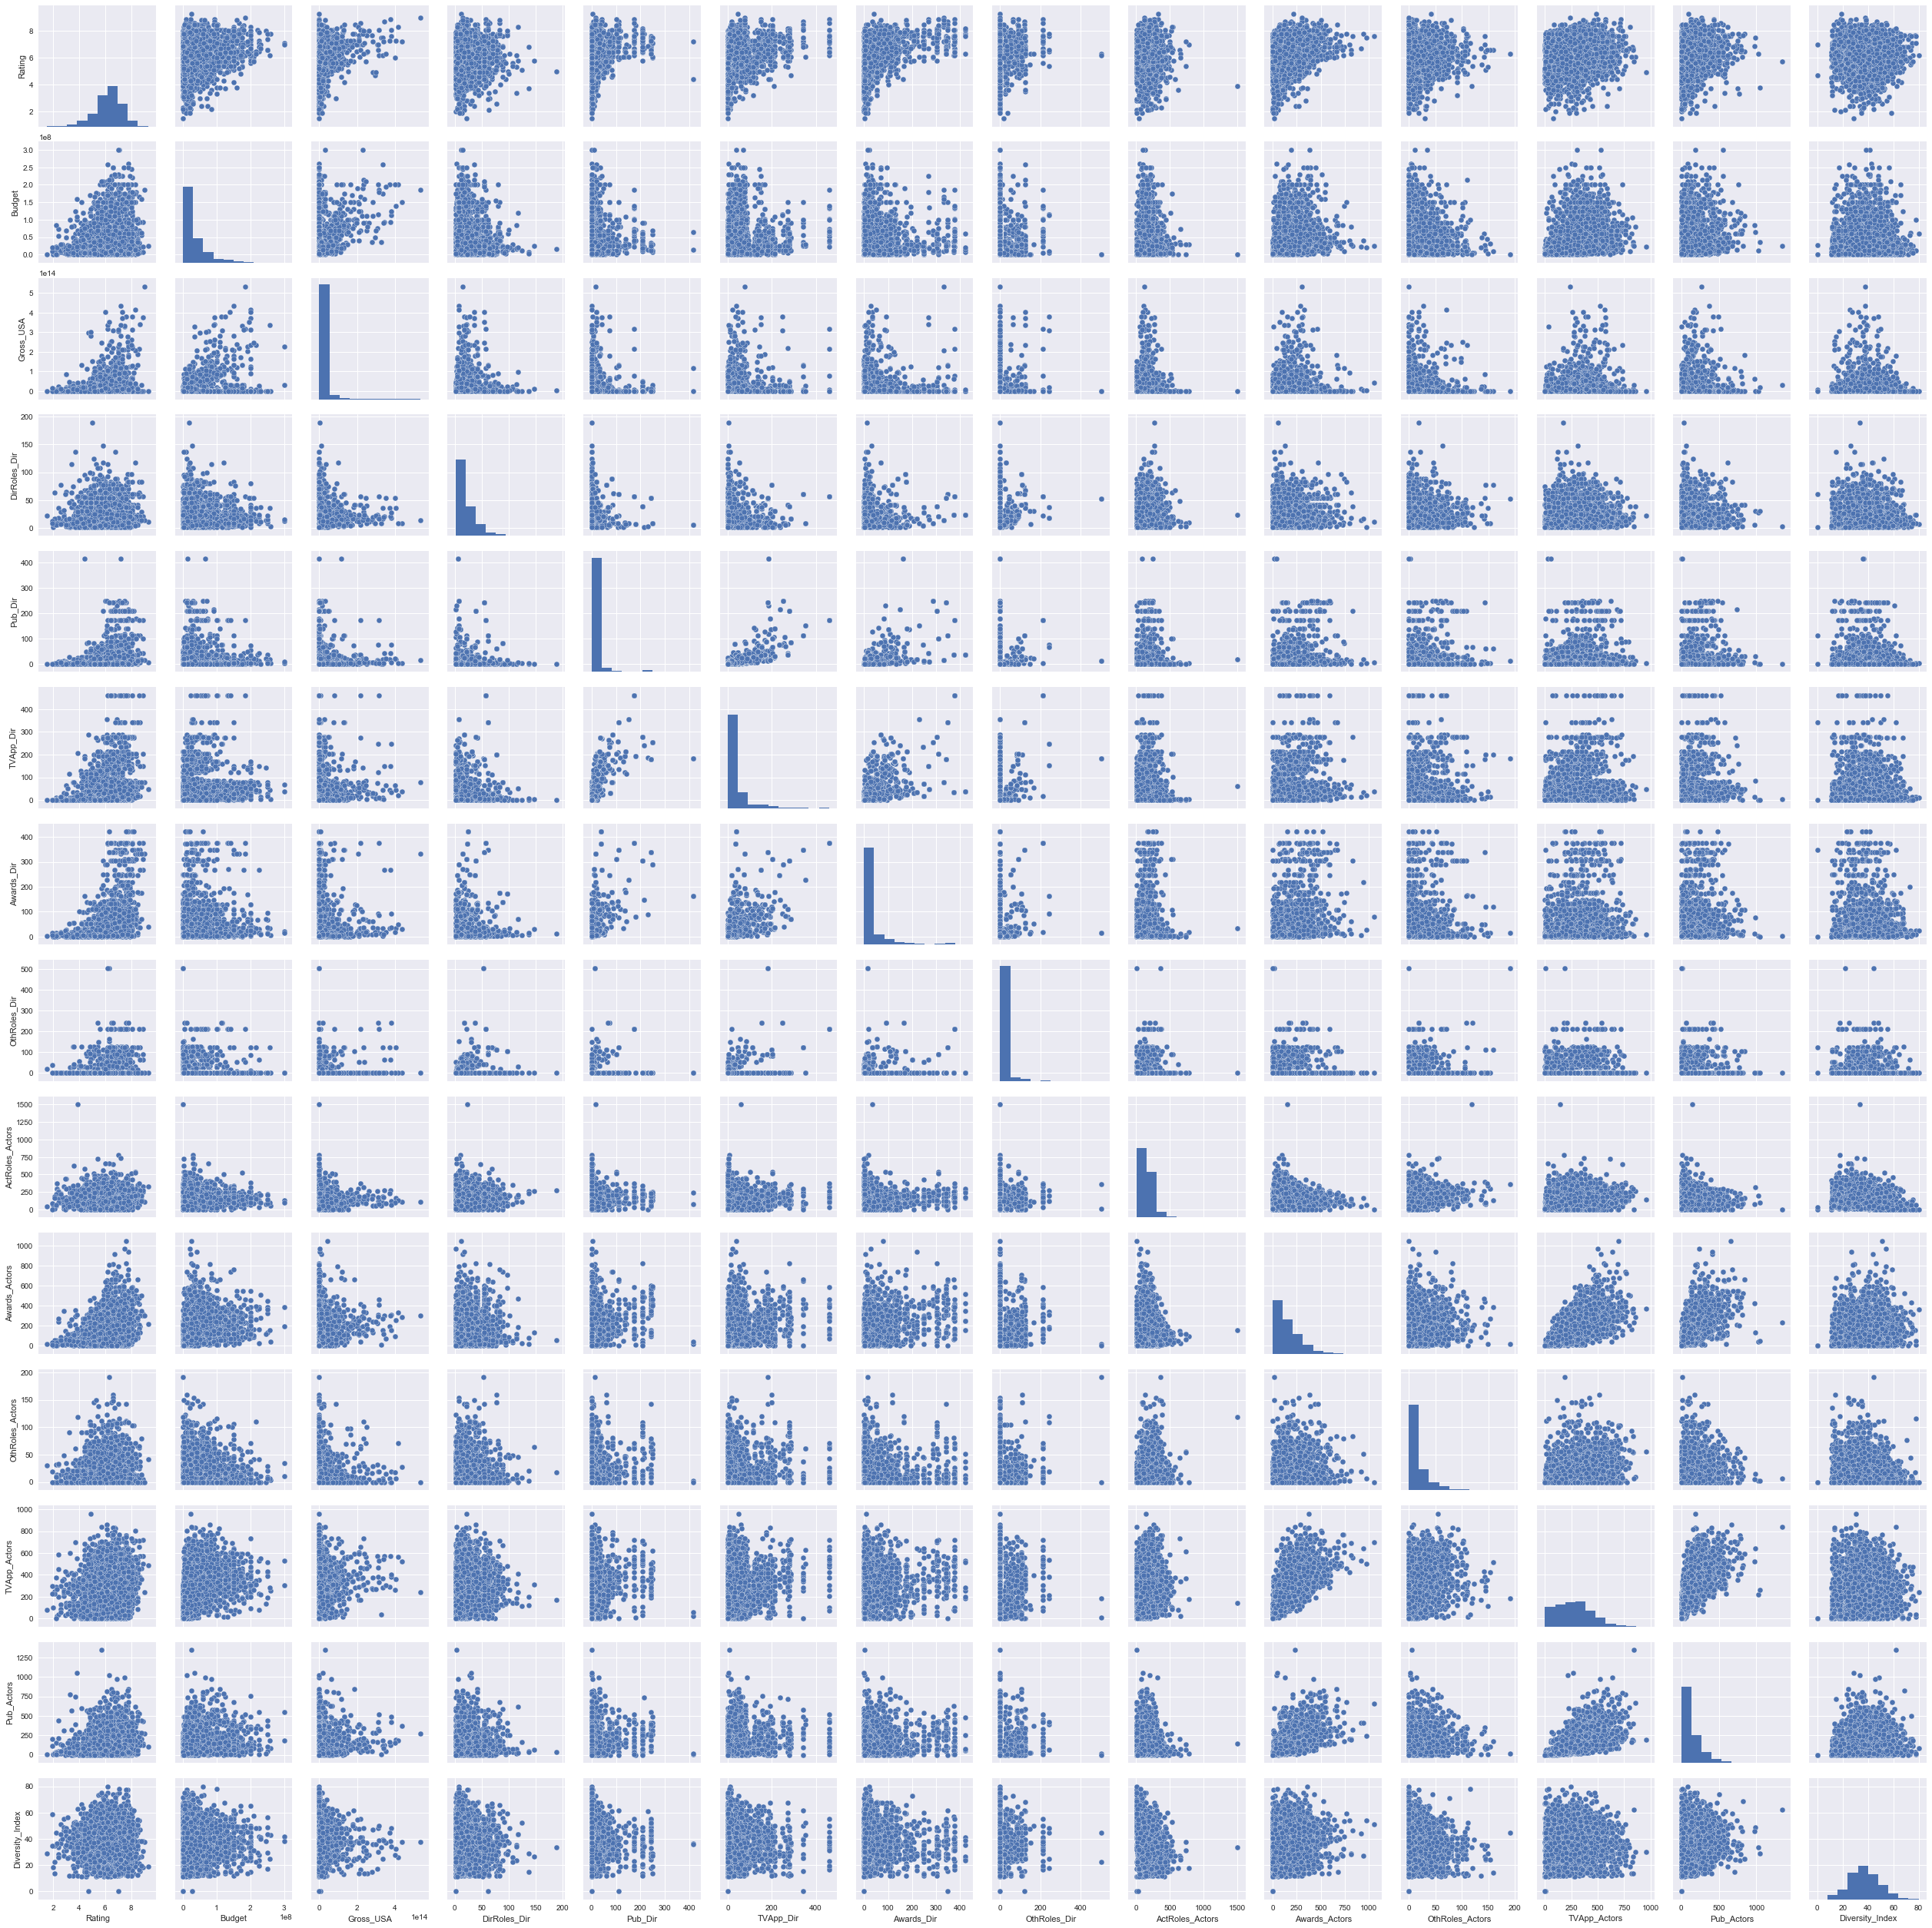

In [24]:
sns.pairplot(df)

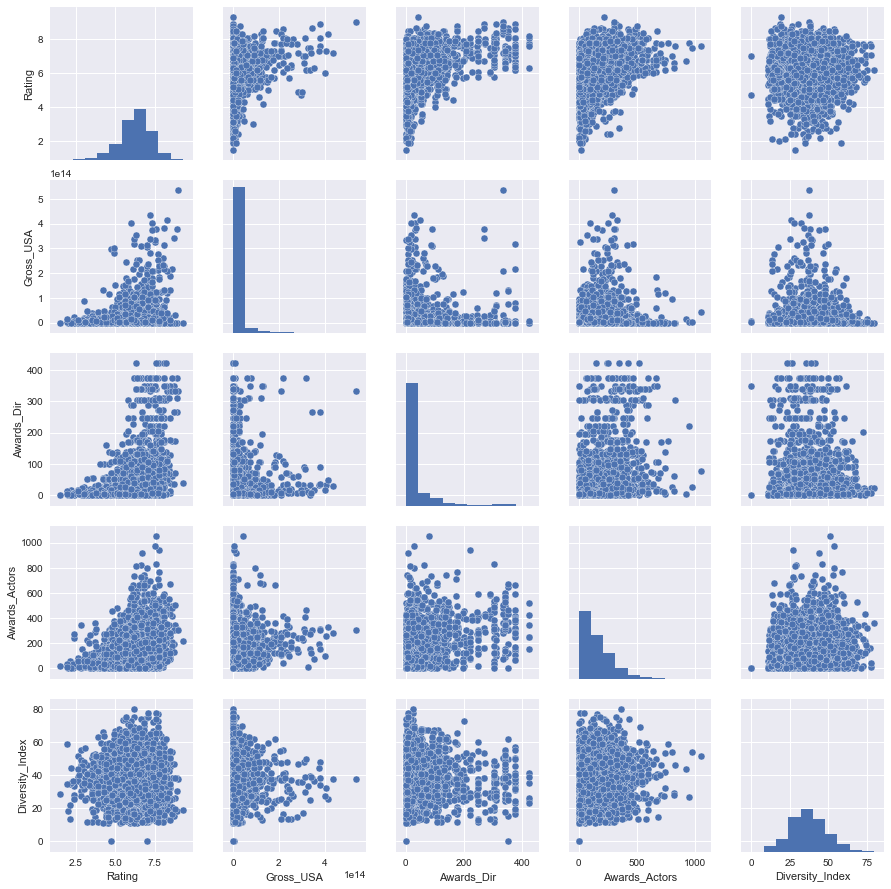

In [25]:
# More Readable Pairplot

sns.pairplot(df[['Rating','Gross_USA','Awards_Dir','Awards_Actors','Diversity_Index']])

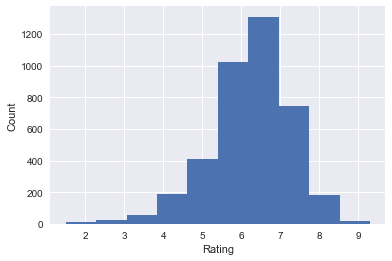

In [26]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

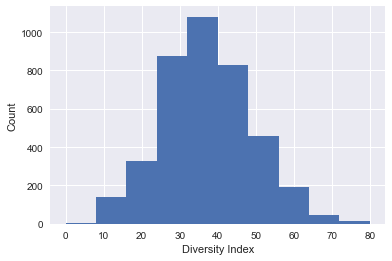

In [27]:
plt.hist(df['Diversity_Index'])
plt.xlabel('Diversity Index')
plt.ylabel('Count')
plt.show();

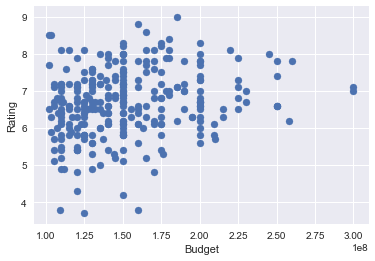

In [28]:
plt.scatter(df[df['Budget']>100000000]['Budget'],
            df[df['Budget']>100000000]['Rating'])
plt.ylabel('Rating')
plt.xlabel('Budget')
plt.show();

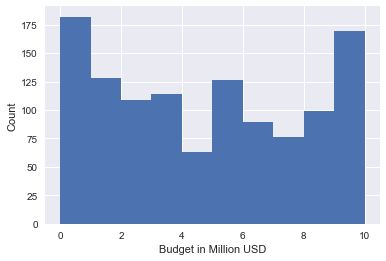

In [29]:
plt.hist(df['Budget']/1000000,range=(0,10))
plt.xlabel('Budget in Million USD')
plt.ylabel('Count')
plt.show();

In [30]:
df[df['Budget']<10000]

Rating  Budget     Gross_USA  \
http://www.imdb.com/title/tt0104815/     6.9  7000.0  2.040920e+06   
http://www.imdb.com/title/tt0163984/     5.5  7300.0  1.367418e+10   
http://www.imdb.com/title/tt0390384/     6.9  7000.0  4.247602e+11   
http://www.imdb.com/title/tt1880418/     6.4  9000.0  4.584152e+09   

                                      DirRoles_Dir  Pub_Dir  TVApp_Dir  \
http://www.imdb.com/title/tt0104815/            43     17.0       79.0   
http://www.imdb.com/title/tt0163984/            13      1.0       29.0   
http://www.imdb.com/title/tt0390384/             3      0.0        3.0   
http://www.imdb.com/title/tt1880418/            15     19.0       50.0   

                                      Awards_Dir  OthRoles_Dir  \
http://www.imdb.com/title/tt0104815/        55.0         125.0   
http://www.imdb.com/title/tt0163984/         7.0           0.0   
http://www.imdb.com/title/tt0390384/        34.0          14.0   
http://www.imdb.com/title/tt1880418/        15.0           0.0   

                                      ActRoles_Actors  Awards_Actors  \
http://www.imdb.com/title/tt0104815/               22              1   
http://www.imdb.com/title/tt0163984/               67              2   
http://www.imdb.com/title/tt0390384/               67             37   
http://www.imdb.com/title/tt1880418/               37             26   

                                      OthRoles_Actors  TVApp_Actors  \
http://www.imdb.com/title/tt0104815/               10             4   
http://www.imdb.com/title/tt0163984/               12             4   
http://www.imdb.com/title/tt0390384/               15             6   
http://www.imdb.com/title/tt1880418/               31            57   

                                      Pub_Actors  Diversity_Index  
http://www.imdb.com/title/tt0104815/           1        44.444444  
http://www.imdb.com/title/tt0163984/           1        33.333333  
http://www.imdb.com/title/tt0390384/           1        18.560606  
http://www.imdb.com/title/tt1880418/          21        55.555556

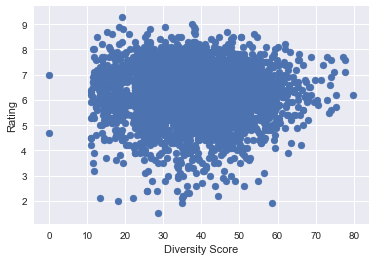

In [31]:
plt.scatter(df['Diversity_Index'],
            df['Rating'])
plt.ylabel('Rating')
plt.xlabel('Diversity Score')
plt.show();

# Split Data into 80% Train/Val and 20% Test Holdout

In [32]:
X = df.drop(columns=['Rating'])
y = df['Rating']

In [33]:
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.2,random_state=12)

# Baselining and Feature Selection

## One Feature - Gross_USA

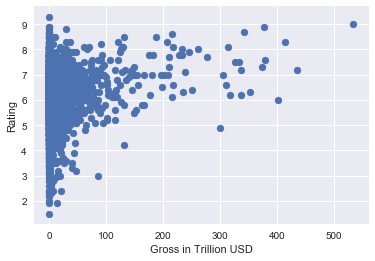

In [34]:
plt.scatter(X['Gross_USA']/1000000000000,y)
plt.xlabel('Gross in Trillion USD')
plt.ylabel('Rating')
plt.show();

In [35]:
# Sklearn outlier detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(X)

# Predict outliers
outlier_detector.predict(X)

/Users/charissa/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (173.679589993525951 > 173.185058594143015)
  % (det, previous_det), RuntimeWarning)
/Users/charissa/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (173.205119639405581 > 173.109334706435646)
  % (det, previous_det), RuntimeWarning)
/Users/charissa/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (173.785498592464194 > 173.495270228056370)
  % (det, previous_det), RuntimeWarning)
/Users/charissa/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (172.915889423389530 > 172.642133198050146)
  % (det, previous_det), RuntimeWarning)
/Users/charissa/anaconda3/lib/python3.6/site-packages/sklearn/covariance/robust_covarian

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
# Estimate the model
lm = LinearRegression()
lm.fit(X.loc[:,['Gross_USA']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['Gross_USA']],y)))

R^2: 0.017


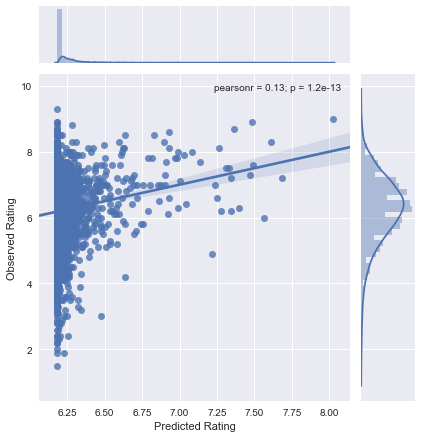

In [37]:
preds = lm.predict(X.loc[:,['Gross_USA']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [38]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['Gross_USA'],lm.coef_))

Intercept: 6.181


[('Gross_USA', 3.4477588680443638e-15)]

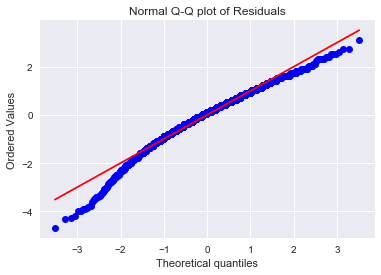

In [39]:
residuals = y - preds
from scipy.stats import probplot
stats.probplot(residuals,dist="norm",plot=plt)
plt.title("Normal Q-Q plot of Residuals")
plt.show();

In [40]:
X = sm.add_constant(X)

In [41]:
model = sm.OLS(y,X.loc[:,['const','Gross_USA']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     55.56
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           1.16e-13
Time:                        12:20:05   Log-Likelihood:                -4522.0
No. Observations:                3169   AIC:                             9048.
Df Residuals:                    3167   BIC:                             9060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1808      0.019    328.235      0.000       6.144       6.218
Gross_USA   3.448e-15   4.63e-16      7.454      0.000    2.54e-15    4.35e-15
==============================================================================
Omnibus:                      250.013   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.813
Skew:                          -0.637   Prob(JB):                     2.71e-79
Kurtosis:                       4.057   Cond. No.                     4.28e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#  An R^2 of 0.017 is not great, let's include more.

## Two Features - Gross_USA and Budget

In [43]:
lm = LinearRegression()
lm.fit(X.loc[:,['Budget','Gross_USA']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['Budget','Gross_USA']],y)))

R^2: 0.028


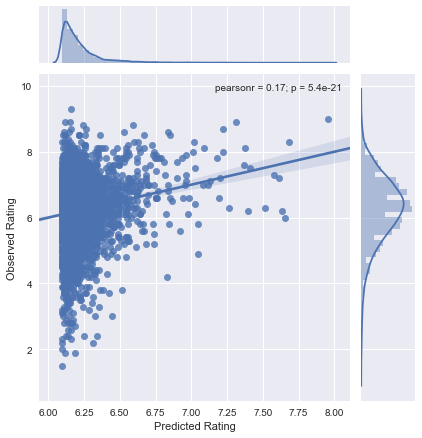

In [44]:
preds = lm.predict(X.loc[:,['Budget','Gross_USA']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [45]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['Budget','Gross_USA'],lm.coef_))

Intercept: 6.096


[('Budget', 2.6181767878354351e-09), ('Gross_USA', 2.5679914702635622e-15)]

In [46]:
model = sm.OLS(y,X.loc[:,['const','Budget','Gross_USA']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     44.81
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           6.45e-20
Time:                        12:20:07   Log-Likelihood:                -4505.3
No. Observations:                3169   AIC:                             9017.
Df Residuals:                    3166   BIC:                             9035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0963      0.024    256.593      0.000       6.050       6.143
Budget      2.618e-09   4.52e-10      5.787      0.000    1.73e-09    3.51e-09
Gross_USA   2.568e-15   4.85e-16      5.299      0.000    1.62e-15    3.52e-15
==============================================================================
Omnibus:                      243.627   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.595
Skew:                          -0.629   Prob(JB):                     2.01e-76
Kurtosis:                       4.028   Cond. No.                     5.43e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# 0.027 is still very low, let's include more

## Four Features - Budget, Gross_USA, Awards_Dir, Awards_Actors

In [48]:
lm = LinearRegression()
lm.fit(X.loc[:,['Budget','Gross_USA','Awards_Dir','Awards_Actors']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['Budget','Gross_USA','Awards_Dir','Awards_Actors']],y)))

R^2: 0.187


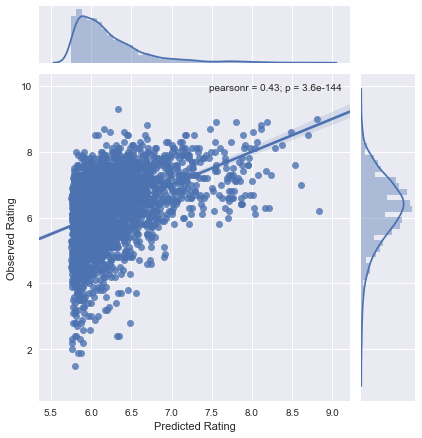

In [49]:
preds = lm.predict(X.loc[:,['Budget','Gross_USA','Awards_Dir','Awards_Actors']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [50]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['Budget','Gross_USA','Awards_Dir','Awards_Actors'],lm.coef_))

Intercept: 5.754


[('Budget', 3.5722842314345808e-10),
 ('Gross_USA', 2.1168675011737955e-15),
 ('Awards_Dir', 0.0038211290925684663),
 ('Awards_Actors', 0.0019455878787119859)]

In [51]:
model = sm.OLS(y,X.loc[:,['const','Budget','Gross_USA','Awards_Dir','Awards_Actors']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          4.38e-140
Time:                        12:20:07   Log-Likelihood:                -4222.4
No. Observations:                3169   AIC:                             8455.
Df Residuals:                    3164   BIC:                             8485.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7537      0.027    215.194      0.000       5.701       5.806
Budget         3.572e-10   4.32e-10      0.827      0.408    -4.9e-10     1.2e-09
Gross_USA      2.117e-15   4.44e-16      4.765      0.000    1.25e-15    2.99e-15
Awards_Dir        0.0038      0.000     14.254      0.000       0.003       0.004
Awards_Actors     0.0019      0.000     13.823      0.000       0.002       0.002
==============================================================================
Omnibus:                      294.089   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.392
Skew:                          -0.704   Prob(JB):                     3.17e-97
Kurtosis:                       4.176   Cond. No.                     6.68e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Later Addition - Awards_Dir, Awards_Actors

In [52]:
lm = LinearRegression()
lm.fit(X.loc[:,['Awards_Dir','Awards_Actors']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['Awards_Dir','Awards_Actors']],y)))

R^2: 0.179


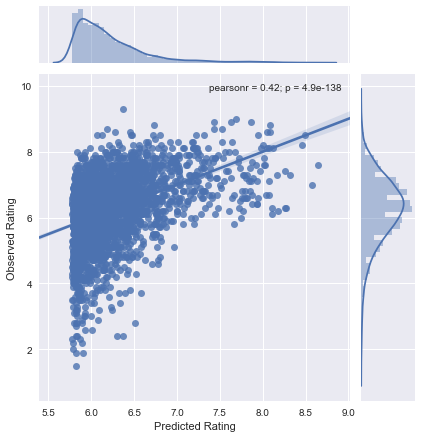

In [53]:
preds = lm.predict(X.loc[:,['Awards_Dir','Awards_Actors']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [54]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['Awards_Dir','Awards_Actors'],lm.coef_))

Intercept: 5.778


[('Awards_Dir', 0.0038871699540243272),
 ('Awards_Actors', 0.0020300863872999273)]

In [55]:
model = sm.OLS(y,X.loc[:,['const','Awards_Dir','Awards_Actors']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     345.7
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.60e-136
Time:                        12:20:09   Log-Likelihood:                -4236.5
No. Observations:                3169   AIC:                             8479.
Df Residuals:                    3166   BIC:                             8497.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7781      0.025    228.937      0.000       5.729       5.828
Awards_Dir        0.0039      0.000     14.472      0.000       0.003       0.004
Awards_Actors     0.0020      0.000     14.998      0.000       0.002       0.002
==============================================================================
Omnibus:                      288.699   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.149
Skew:                          -0.698   Prob(JB):                     1.45e-94
Kurtosis:                       4.152   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# That helps, although Budget doesn't look great, 
# R^2 is up to 0.187,
# let's see what happens if we add even more features

## Full Model - All Features

In [57]:
lm = LinearRegression()
lm.fit(X,y)
print('R^2: %.3f' %(lm.score(X,y)))

R^2: 0.216


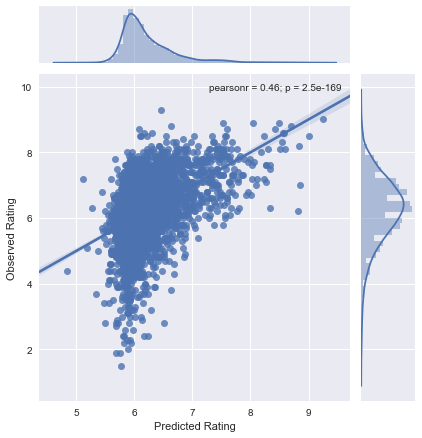

In [58]:
preds = lm.predict(X)
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [59]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(X.columns,lm.coef_))

Intercept: 5.966


[('const', 0.0),
 ('Budget', 5.7719257820530848e-10),
 ('Gross_USA', 1.9681256942286651e-15),
 ('DirRoles_Dir', -0.0048635884267726696),
 ('Pub_Dir', -0.0053331223778164934),
 ('TVApp_Dir', 0.0017933953517729655),
 ('Awards_Dir', 0.0048750864443465169),
 ('OthRoles_Dir', 0.00010593554205964222),
 ('ActRoles_Actors', 0.00022205349941693212),
 ('Awards_Actors', 0.0027567839681633365),
 ('OthRoles_Actors', -0.0019378256714832412),
 ('TVApp_Actors', -0.00042055715713589306),
 ('Pub_Actors', -0.0005398099582939889),
 ('Diversity_Index', -0.0026716692025084386)]

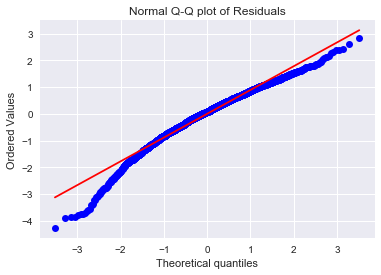

In [60]:
residuals = y - preds
from scipy.stats import probplot
stats.probplot(residuals,dist="norm",plot=plt)
plt.title("Normal Q-Q plot of Residuals")
plt.show();

In [61]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     66.74
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.07e-155
Time:                        12:20:10   Log-Likelihood:                -4164.6
No. Observations:                3169   AIC:                             8357.
Df Residuals:                    3155   BIC:                             8442.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.9658      0.074     80.095      0.000       5.820       6.112
Budget           5.772e-10    4.4e-10      1.312      0.190   -2.86e-10    1.44e-09
Gross_USA        1.968e-15    4.4e-16      4.472      0.000    1.11e-15    2.83e-15
DirRoles_Dir       -0.0049      0.001     -5.047      0.000      -0.007      -0.003
Pub_Dir            -0.0053      0.001     -6.602      0.000      -0.007      -0.004
TVApp_Dir           0.0018      0.000      3.940      0.000       0.001       0.003
Awards_Dir          0.0049      0.000     12.409      0.000       0.004       0.006
OthRoles_Dir        0.0001      0.001      0.161      0.872      -0.001       0.001
ActRoles_Actors     0.0002      0.000      1.185      0.236      -0.000       0.001
Awards_Actors       0.0028      0.000     14.015      0.000       0.002       0.003
OthRoles_Actors    -0.0019      0.001     -2.295      0.022      -0.004      -0.000
TVApp_Actors       -0.0004      0.000     -2.576      0.010      -0.001      -0.000
Pub_Actors         -0.0005      0.000     -3.167      0.002      -0.001      -0.000
Diversity_Index    -0.0027      0.001     -1.809      0.071      -0.006       0.000
==============================================================================
Omnibus:                      314.622   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.853
Skew:                          -0.727   Prob(JB):                    5.77e-108
Kurtosis:                       4.276   Cond. No.                     1.89e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#  Given the high P-values, let's remove Budget, Other roles Director, Acting Roles Actors
#  Meanwhile, R^2 is up to 0.216

## Restricted Model - Less Features

In [63]:
X.columns

Index(['const', 'Budget', 'Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir',
       'Awards_Dir', 'OthRoles_Dir', 'ActRoles_Actors', 'Awards_Actors',
       'OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index'],
      dtype='object')

In [64]:
lm = LinearRegression()
lm.fit(X.loc[:,['Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']],y)))

R^2: 0.215


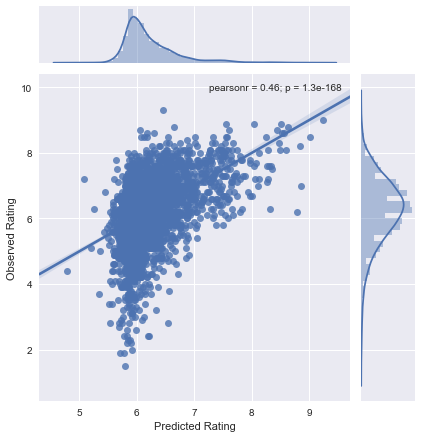

In [65]:
preds = lm.predict(X.loc[:,['Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [66]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index'],lm.coef_))

Intercept: 6.013


[('Gross_USA', 2.1210507296905302e-15),
 ('DirRoles_Dir', -0.0047484679075308718),
 ('Pub_Dir', -0.0054471448693569268),
 ('TVApp_Dir', 0.0018841382639200978),
 ('Awards_Dir', 0.0048767636946479278),
 ('Awards_Actors', 0.0027523972619924904),
 ('OthRoles_Actors', -0.0018672352763784588),
 ('TVApp_Actors', -0.00034336601015047844),
 ('Pub_Actors', -0.00055619490342404508),
 ('Diversity_Index', -0.0031503309350486676)]

In [67]:
residuals = y - preds

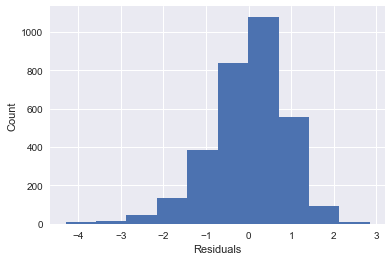

In [68]:
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show();

In [69]:
# This residual plot does not look great, 
# Errors lie around 0, but have a longer left- than right tail
# left-skewed

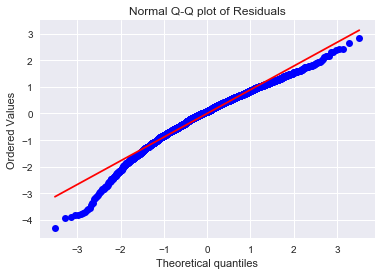

In [70]:
from scipy.stats import probplot
stats.probplot(residuals,dist="norm",plot=plt)
plt.title("Normal Q-Q plot of Residuals")
plt.show();

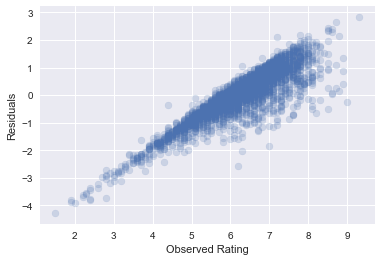

In [71]:
plt.scatter(y,residuals,alpha=.2)
plt.xlabel('Observed Rating')
plt.ylabel('Residuals')
plt.show();

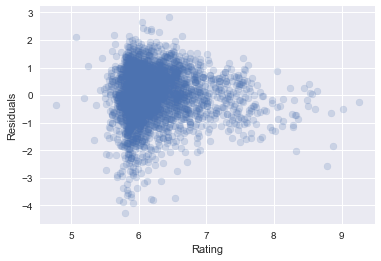

In [72]:
plt.scatter(preds,residuals,alpha=.2)
plt.xlabel('Rating')
plt.ylabel('Residuals')
plt.show();

In [73]:
# There is definitely a pattern in the errors: 
# it seems that due to the estimation of the constant/intercept
# the model overestimates for low ratings and underestimates
# for high ratings

In [74]:
model = sm.OLS(y,X.loc[:,['const','Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     86.44
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          6.99e-158
Time:                        12:20:12   Log-Likelihood:                -4166.2
No. Observations:                3169   AIC:                             8354.
Df Residuals:                    3158   BIC:                             8421.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0131      0.065     91.915      0.000       5.885       6.141
Gross_USA        2.121e-15   4.19e-16      5.058      0.000     1.3e-15    2.94e-15
DirRoles_Dir       -0.0047      0.001     -4.992      0.000      -0.007      -0.003
Pub_Dir            -0.0054      0.001     -6.834      0.000      -0.007      -0.004
TVApp_Dir           0.0019      0.000      4.375      0.000       0.001       0.003
Awards_Dir          0.0049      0.000     12.488      0.000       0.004       0.006
Awards_Actors       0.0028      0.000     14.106      0.000       0.002       0.003
OthRoles_Actors    -0.0019      0.001     -2.231      0.026      -0.004      -0.000
TVApp_Actors       -0.0003      0.000     -2.188      0.029      -0.001   -3.56e-05
Pub_Actors         -0.0006      0.000     -3.295      0.001      -0.001      -0.000
Diversity_Index    -0.0032      0.001     -2.213      0.027      -0.006      -0.000
==============================================================================
Omnibus:                      311.551   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.771
Skew:                          -0.721   Prob(JB):                    7.32e-107
Kurtosis:                       4.273   Cond. No.                     1.66e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# By removing these three variables, our R^2 went down by 0.001
# while our Adj R^2 stayed the same
# Let's try a transformation to see if we can get rid of the 
# pattern in the errors

## Try transformation of Some Features to log to solve for right skewed distributions

In [76]:
X['LogGross_USA'] = np.log(X['Gross_USA'])
X['LogDirRoles_Dir'] = np.log(X['DirRoles_Dir'])

In [77]:
X.columns

Index(['const', 'Budget', 'Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir',
       'Awards_Dir', 'OthRoles_Dir', 'ActRoles_Actors', 'Awards_Actors',
       'OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index',
       'LogGross_USA', 'LogDirRoles_Dir'],
      dtype='object')

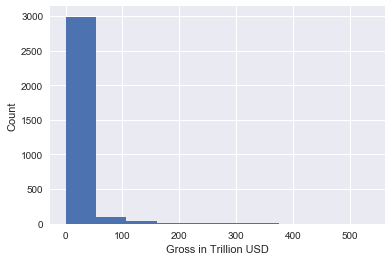

In [78]:
plt.hist(X['Gross_USA']/1000000000000)
plt.xlabel('Gross in Trillion USD')
plt.ylabel('Count')
plt.show();

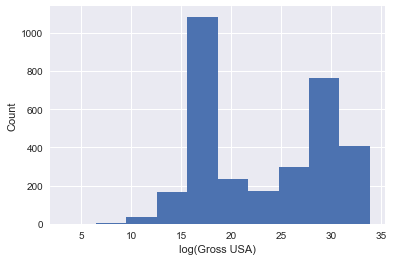

In [79]:
plt.hist(X['LogGross_USA'])
plt.xlabel('log(Gross USA)')
plt.ylabel('Count')
plt.show();

In [80]:
#  This distribution looks slightly better

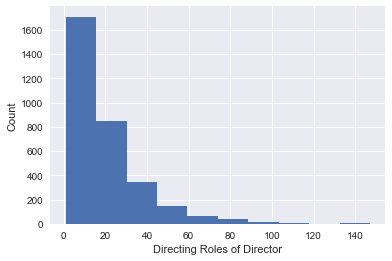

In [81]:
plt.hist(X['DirRoles_Dir'])
plt.xlabel('Directing Roles of Director')
plt.ylabel('Count')
plt.show();

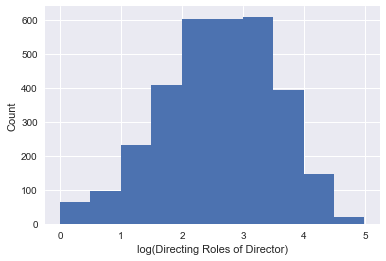

In [82]:
plt.hist(X['LogDirRoles_Dir'])
plt.xlabel('log(Directing Roles of Director)')
plt.ylabel('Count')
plt.show();

In [83]:
#  That distribution looks a lot better

In [84]:
X.columns

Index(['const', 'Budget', 'Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 'TVApp_Dir',
       'Awards_Dir', 'OthRoles_Dir', 'ActRoles_Actors', 'Awards_Actors',
       'OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index',
       'LogGross_USA', 'LogDirRoles_Dir'],
      dtype='object')

In [85]:
lm = LinearRegression()
lm.fit(X.loc[:,['LogGross_USA', 'LogDirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']],y)
print('R^2: %.3f' %(lm.score(X.loc[:,['LogGross_USA', 'LogDirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']],y)))

R^2: 0.203


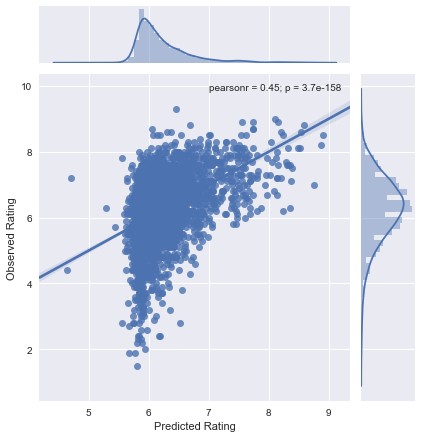

In [86]:
preds = lm.predict(X.loc[:,['LogGross_USA', 'LogDirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']])
sns.jointplot(preds,y, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [87]:
print('Intercept: %.3f' %(lm.intercept_))
list(zip(['LogGross_USA', 'LogDirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index'],lm.coef_))

Intercept: 6.022


[('LogGross_USA', -6.0473551529436293e-05),
 ('LogDirRoles_Dir', -0.031380699599453089),
 ('Pub_Dir', -0.0057124327238546775),
 ('TVApp_Dir', 0.0018717589768808239),
 ('Awards_Dir', 0.0048483427498213503),
 ('Awards_Actors', 0.0027892461867803494),
 ('OthRoles_Actors', -0.0020424836167463323),
 ('TVApp_Actors', -0.00031162459212581359),
 ('Pub_Actors', -0.00056391528030261956),
 ('Diversity_Index', -0.0031219700498406689)]

In [88]:
residuals = y - preds

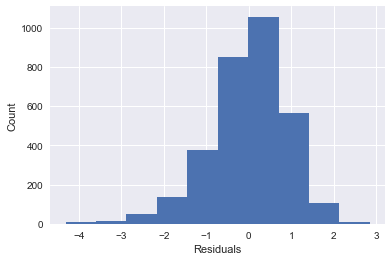

In [89]:
# Let's look at the residuals
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show();

In [90]:
# This does not seem to have solved anything, 
# it actually made the R^2 worse

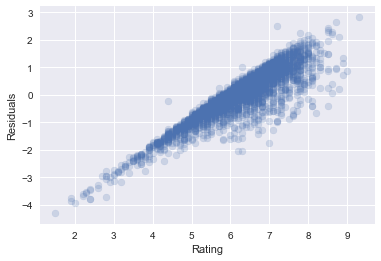

In [91]:
plt.scatter(y,residuals,alpha=.2)
plt.xlabel('Rating')
plt.ylabel('Residuals')
plt.show();

In [92]:
# Nothing has changed,
# the model still overestimates for low ratings 
# and underestimates for high ratings

In [93]:
model = sm.OLS(y,X.loc[:,['const','LogGross_USA', 'LogDirRoles_Dir', 'Pub_Dir', 'TVApp_Dir','Awards_Dir', 'Awards_Actors','OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors', 'Diversity_Index']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     80.37
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.45e-147
Time:                        12:20:13   Log-Likelihood:                -4190.2
No. Observations:                3169   AIC:                             8402.
Df Residuals:                    3158   BIC:                             8469.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0221      0.100     60.484      0.000       5.827       6.217
LogGross_USA    -6.047e-05      0.003     -0.023      0.981      -0.005       0.005
LogDirRoles_Dir    -0.0314      0.018     -1.709      0.087      -0.067       0.005
Pub_Dir            -0.0057      0.001     -7.113      0.000      -0.007      -0.004
TVApp_Dir           0.0019      0.000      4.312      0.000       0.001       0.003
Awards_Dir          0.0048      0.000     12.315      0.000       0.004       0.006
Awards_Actors       0.0028      0.000     14.178      0.000       0.002       0.003
OthRoles_Actors    -0.0020      0.001     -2.420      0.016      -0.004      -0.000
TVApp_Actors       -0.0003      0.000     -1.969      0.049      -0.001   -1.37e-06
Pub_Actors         -0.0006      0.000     -3.315      0.001      -0.001      -0.000
Diversity_Index    -0.0031      0.001     -2.177      0.030      -0.006      -0.000
==============================================================================
Omnibus:                      296.390   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.108
Skew:                          -0.703   Prob(JB):                     4.06e-99
Kurtosis:                       4.205   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#  We'll stick with the nontransformed variable set

In [95]:
selected_columns = ['Gross_USA', 'DirRoles_Dir', 'Pub_Dir', 
                    'TVApp_Dir','Awards_Dir', 'Awards_Actors',
                    'OthRoles_Actors', 'TVApp_Actors', 'Pub_Actors',
                    'Diversity_Index']

# Model Selection by means of Cross Validation

In [96]:
X, y = np.array(X.loc[:,selected_columns]), np.array(y)

In [97]:
len(X)

3169

In [98]:
# Run Cross Validation with different models

In [99]:
from sklearn.linear_model import RidgeCV

lm_rid = RidgeCV(cv=5)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lm_rid.fit(X_scaled,y)
print('Recommended Ridge Alpha: %.1f' %(lm_rid.alpha_))

Recommended Ridge Alpha: 10.0


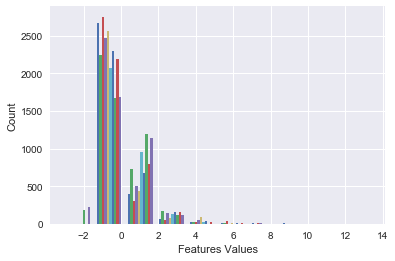

In [100]:
# check out the standardization
plt.hist(X_scaled)
plt.xlabel('Features Values')
plt.ylabel('Count')
plt.show();

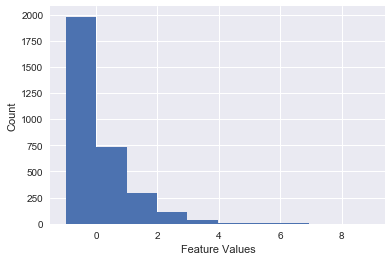

In [101]:
plt.hist(X_scaled[:,8])
plt.xlabel('Feature Values')
plt.ylabel('Count')
plt.show();

In [102]:
from sklearn.linear_model import LassoCV

lm_las = LassoCV(cv=5)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lm_las.fit(X_scaled,y)
print('Recommend Lasso Alpha: %f' %(lm_las.alpha_))

Recommend Lasso Alpha: 0.000359


In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state = 12)
cv_lm_r2s, cv_lm_poly_r2s, cv_lm_rid_r2s, cv_lm_las_r2s, cv_rf_r2s, cv_gbm_r2s = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
# Split into Train and Validation    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # six models
    lm = LinearRegression()
    lm_poly = LinearRegression()
    lm_rid = Ridge(alpha=10)
    lm_las = Lasso(0.00035987923557733456)
    rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
    gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.01)
    
    
    # simple linear regression
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    # polynomial linear regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    # ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_rid.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_rid.score(X_val_scaled, y_val))
    
    # lasso with feature scaling
    lm_las.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_las.score(X_val_scaled, y_val))
    
    # random forest
    rf.fit(X_train, y_train)
    cv_rf_r2s.append(rf.score(X_val, y_val))
    
    # gradient boosted
    gbm.fit(X_train, y_train)
    cv_gbm_r2s.append(gbm.score(X_val, y_val))

print('Simple regression scores: ', cv_lm_r2s,'\n')
print('Degree 2 polynomial regression scores: ', cv_lm_poly_r2s, '\n')
print('Ridge scores: ', cv_lm_rid_r2s, '\n')
print('Lasso scores: ', cv_lm_las_r2s, '\n')
print('Random Forest Regression scores: ', cv_rf_r2s, '\n')
print('Gradient Boosted Regression scores: ', cv_gbm_r2s, '\n')

print('Simple regression mean CV R^2: %.3f +- %.3f' %(np.mean(cv_lm_r2s),np.std(cv_lm_r2s)))
print('Degree 2 polynomial mean CV R^2: %.3f +- %.3f' %(np.mean(cv_lm_poly_r2s),np.std(cv_lm_poly_r2s)))
print('Ridge mean CV R^2: %.3f +- %.3f' %(np.mean(cv_lm_rid_r2s),np.std(cv_lm_rid_r2s)))
print('Lasso mean CV R^2: %.3f +- %.3f' %(np.mean(cv_lm_las_r2s),np.std(cv_lm_las_r2s)))
print('Random Forest mean CV R^2: %.3f +- %.3f' %(np.mean(cv_rf_r2s),np.std(cv_rf_r2s)))
print('Gradient Boosted mean CV R^2: %.3f +- %.3f' %(np.mean(cv_gbm_r2s),np.std(cv_gbm_r2s)))

Simple regression scores:  [0.19791221759931388, 0.20969158661869525, 0.21904521200896943, 0.19847909628018934, 0.22278677610146558] 

Degree 2 polynomial regression scores:  [0.006746410789209567, 0.03209748366400611, 0.02092709088362521, -0.036899075444350116, 0.025668439854757526] 

Ridge scores:  [0.19805649407670733, 0.20984978834196077, 0.21933961702752636, 0.19839367080630269, 0.22240228696287012] 

Lasso scores:  [0.19796730887539793, 0.20977791404467949, 0.21914812095130642, 0.1984147838660231, 0.22261714941504374] 

Random Forest Regression scores:  [0.23368815642668594, 0.2572489576981406, 0.26192145867011529, 0.23614513538342644, 0.22753267444010236] 

Gradient Boosted Regression scores:  [0.23416236219667674, 0.29922924933569739, 0.27643077166794616, 0.2531820597557104, 0.26185633029753452] 

Simple regression mean CV R^2: 0.210 +- 0.010
Degree 2 polynomial mean CV R^2: 0.010 +- 0.025
Ridge mean CV R^2: 0.210 +- 0.010
Lasso mean CV R^2: 0.210 +- 0.010
Random Forest mean CV

In [104]:
# Given the lack of improvement in R^2 and variance provided by the Ridge regularization, 
# simple linear regression looks like the way to go.
# Unless... We want to go for the Gradient Boosted with a higher
# variance in R^2 but a higher overall R^2 offsetting this

In [105]:
print('Simple Linear Model Coefficients:')
list(zip(selected_columns,lm.coef_))

Simple Linear Model Coefficients:


[('Gross_USA', 1.9457014843793962e-15),
 ('DirRoles_Dir', -0.0046025943342359165),
 ('Pub_Dir', -0.0051318569513767367),
 ('TVApp_Dir', 0.0018858125569139862),
 ('Awards_Dir', 0.0048302098137087343),
 ('Awards_Actors', 0.0026360314584318147),
 ('OthRoles_Actors', -0.0022416376375657956),
 ('TVApp_Actors', -0.00026954215178174494),
 ('Pub_Actors', -0.00047978096967295377),
 ('Diversity_Index', -0.0037316156817060854)]

In [106]:
print('Ridge Regression Coefficients:')
list(zip(selected_columns,lm_rid.coef_))

Ridge Regression Coefficients:


[('Gross_USA', 0.077003301333627275),
 ('DirRoles_Dir', -0.082171876430149254),
 ('Pub_Dir', -0.17390975558448032),
 ('TVApp_Dir', 0.1153958284621021),
 ('Awards_Dir', 0.32129682635562551),
 ('Awards_Actors', 0.3397782821198525),
 ('OthRoles_Actors', -0.048131170533284563),
 ('TVApp_Actors', -0.042479059176377662),
 ('Pub_Actors', -0.064977455463242795),
 ('Diversity_Index', -0.043756150446169199)]

In [107]:
print('Lasso Regression Coefficients:')
list(zip(selected_columns,lm_las.coef_))

Lasso Regression Coefficients:


[('Gross_USA', 0.076782937657075376),
 ('DirRoles_Dir', -0.08225249607875211),
 ('Pub_Dir', -0.17617875862400273),
 ('TVApp_Dir', 0.11552136267472292),
 ('Awards_Dir', 0.3234896941928046),
 ('Awards_Actors', 0.34121015285728157),
 ('OthRoles_Actors', -0.047878953105458956),
 ('TVApp_Actors', -0.043078556443826958),
 ('Pub_Actors', -0.065510605251082626),
 ('Diversity_Index', -0.043683805642339459)]

In [108]:
# These regularized coefficients show that the number of award nominations and wins for 
# the directors and actors appear to be important. Gross's coefficient was
# greatly reduced. However, none of the coefficients were actually
# close enough to zero to be able to say they could be removed from the model
# to reduce complexity.

In [109]:
print('Random Forest Model Feature Importances:')
list(zip(selected_columns,rf.feature_importances_))

Random Forest Model Feature Importances:


[('Gross_USA', 0.05634739173070314),
 ('DirRoles_Dir', 0.04992214856461271),
 ('Pub_Dir', 0.065891470731722121),
 ('TVApp_Dir', 0.14793147813215751),
 ('Awards_Dir', 0.3172416201149213),
 ('Awards_Actors', 0.22324826516572036),
 ('OthRoles_Actors', 0.024083449260426142),
 ('TVApp_Actors', 0.04939225320153702),
 ('Pub_Actors', 0.043547342662336272),
 ('Diversity_Index', 0.022394580435862926)]

In [110]:
print('Gradient Boosted Model Feature Importances:')
list(zip(selected_columns,gbm.feature_importances_))

Gradient Boosted Model Feature Importances:


[('Gross_USA', 0.19246279398936186),
 ('DirRoles_Dir', 0.079482912547782114),
 ('Pub_Dir', 0.028574456189493964),
 ('TVApp_Dir', 0.093722464816404991),
 ('Awards_Dir', 0.086852070036403439),
 ('Awards_Actors', 0.11893653662683709),
 ('OthRoles_Actors', 0.077578162895078601),
 ('TVApp_Actors', 0.11862067785693953),
 ('Pub_Actors', 0.11073801865025446),
 ('Diversity_Index', 0.09303190639144418)]

In [111]:
# From the feature importances we can see that the diversity index
# seems to be of similar importance as some of the other
# actor and director specific features

# Final Fit to Training Data and Score on Holdout/Test

In [112]:
len(X_holdout)

793

In [113]:
len(y_holdout)

793

In [114]:
X_holdout, y_holdout = np.array(X_holdout.loc[:,selected_columns]), np.array(y_holdout)

In [115]:
# five models
lm = LinearRegression()
lm_rid = Ridge(alpha=10)
lm_las = Lasso(alpha=0.00035987923557733456)
rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.01)

# simple linear regression
lm.fit(X,y)
y_pred_lm = lm.predict(X_holdout)
print('Simple regression test R^2:  %.3f' %(lm.score(X_holdout,y_holdout)))

#ridge with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_holdout_scaled = scaler.transform(X_holdout)

lm_rid.fit(X_scaled, y)
print('Ridge regression test R^2:  %.3f' %(lm_rid.score(X_holdout_scaled, y_holdout)))

#lasso with feature scaling
lm_las.fit(X_scaled, y)
print('Lasso regression test R^2:  %.3f' %(lm_las.score(X_holdout_scaled, y_holdout)))

#random forest
rf.fit(X, y)
print('Random Forest regression test R^2:  %.3f' %(rf.score(X_holdout, y_holdout)))

#gradient boosted
gbm.fit(X, y)
y_pred = gbm.predict(X_holdout)
print('Gradient Boosted regression test R^2:  %.3f' %(gbm.score(X_holdout, y_holdout)))

Simple regression test R^2:  0.215
Ridge regression test R^2:  0.215
Lasso regression test R^2:  0.215
Random Forest regression test R^2:  0.282
Gradient Boosted regression test R^2:  0.329


In [116]:
print('Simple Linear Model Coefficients:')
list(zip(selected_columns,lm.coef_))

Simple Linear Model Coefficients:


[('Gross_USA', 2.1210507296905302e-15),
 ('DirRoles_Dir', -0.0047484679075308718),
 ('Pub_Dir', -0.0054471448693569268),
 ('TVApp_Dir', 0.0018841382639200978),
 ('Awards_Dir', 0.0048767636946479278),
 ('Awards_Actors', 0.0027523972619924904),
 ('OthRoles_Actors', -0.0018672352763784588),
 ('TVApp_Actors', -0.00034336601015047844),
 ('Pub_Actors', -0.00055619490342404508),
 ('Diversity_Index', -0.0031503309350486676)]

In [117]:
print('Random Forest Model Feature Importances:')
list(zip(selected_columns,rf.feature_importances_))

Random Forest Model Feature Importances:


[('Gross_USA', 0.053617345261699367),
 ('DirRoles_Dir', 0.047228093947406097),
 ('Pub_Dir', 0.057442244217811279),
 ('TVApp_Dir', 0.13928277650487986),
 ('Awards_Dir', 0.33699770954155733),
 ('Awards_Actors', 0.2367618921982336),
 ('OthRoles_Actors', 0.021876850518387371),
 ('TVApp_Actors', 0.044080689726716388),
 ('Pub_Actors', 0.043323277929970198),
 ('Diversity_Index', 0.019389120153338178)]

In [118]:
print('Gradient Boosted Model Feature Importances:')
list(zip(selected_columns,gbm.feature_importances_))

Gradient Boosted Model Feature Importances:


[('Gross_USA', 0.18359892993119514),
 ('DirRoles_Dir', 0.079954068901003594),
 ('Pub_Dir', 0.02465164213783378),
 ('TVApp_Dir', 0.099163288272058669),
 ('Awards_Dir', 0.088200936038291336),
 ('Awards_Actors', 0.13592773657064711),
 ('OthRoles_Actors', 0.070499431688129541),
 ('TVApp_Actors', 0.1183091298194133),
 ('Pub_Actors', 0.1149335542549149),
 ('Diversity_Index', 0.084761282386512857)]

Model fit of Simple Linear Regression


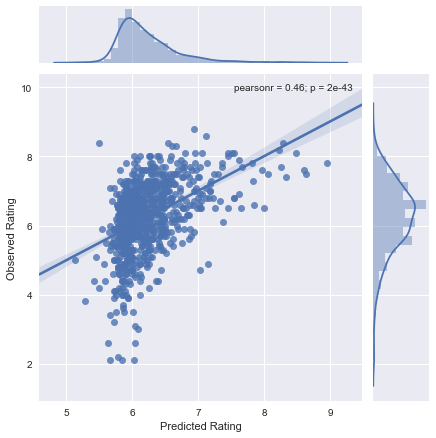

In [119]:
print('Model fit of Simple Linear Regression')
sns.jointplot(y_pred_lm, y_holdout, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

Model fit of Gradient Boosted Regression


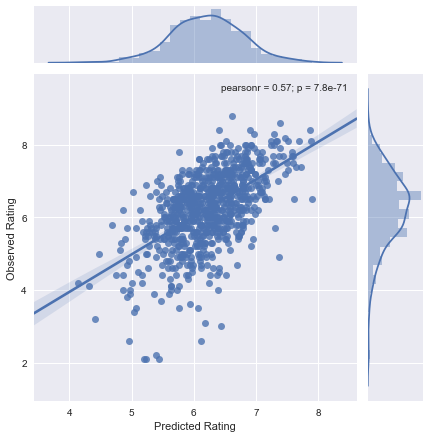

In [120]:
print('Model fit of Gradient Boosted Regression')
sns.jointplot(y_pred, y_holdout, kind='regplot')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating');

In [121]:
# It seems that with the features we have available
# we are able to explain about 21% and 33% of the variance in movie ratings
# based primarily on characteristics of both the actors and director of the movie
# by using a simple linear regression model, or a gradient boosted regression respectively

# This model is far from perfect and most likely more transformations to 
# the data are required to be able to create a better fitting model

# What the models have shown us is that actor and director specific
# features give some signal about movie ratings. What is most
# interesting is that the diversity index did appear to have
# importance in the models as well. More research to be done.